In [1]:
import sys

bob_lib_path = '../../python/bob/'
sys.path.append(bob_lib_path)
import commit_stat_engineering

In [2]:
project_root_path = '../../..'

In [3]:
# this is the other way to handle imports, if you want the code visible:
# %load /home/bob/projects/Web3HackerNetwork/sandbox/python/bob/commit_stat_engineering.py

In [4]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

In [5]:
first = True
for stat in [stat for stat in all_stats if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0 and stat['jsonFiles'] > 0 and stat['javascriptFiles'] > 0]:
    if first:
        print(json.dumps(stat, indent=2))
        first = False
    else: break

{
  "commit": "5629c4b1eae0d9db3dd25e5ada2d91393005a3d0",
  "totalFiles": 851,
  "binFiles": 62,
  "textFiles": 789,
  "textLines": 402917,
  "javascriptFiles": 114,
  "javascriptLines": 9928,
  "javascriptFilePct": 13.39,
  "javascriptLinePct": 2.46,
  "rustFiles": 209,
  "rustLines": 8440,
  "rustFilePct": 24.55,
  "rustLinePct": 2.09,
  "markdownFiles": 36,
  "markdownLines": 5858,
  "markdownFilePct": 4.23,
  "markdownLinePct": 1.45,
  "jsonFiles": 141,
  "jsonLines": 369338,
  "jsonFilePct": 16.56,
  "jsonLinePct": 91.66,
  "imgFiles": 48,
  "imgFilePct": 5.64,
  "lockFiles": 0,
  "lockLines": 0,
  "lockFilePct": 0,
  "lockLinePct": 0,
  "yarnFiles": 3,
  "yarnLines": 233,
  "yarnFilePct": 0.35,
  "yarnLinePct": 0.05,
  "htmlFiles": 42,
  "htmlLines": 3422,
  "htmlFilePct": 4.93,
  "htmlLinePct": 0.84,
  "clojureFiles": 46,
  "clojureLines": 1106,
  "clojureFilePct": 5.4,
  "clojureLinePct": 0.27,
  "shellFiles": 52,
  "shellLines": 718,
  "shellFilePct": 6.11,
  "shellLinePct": 0

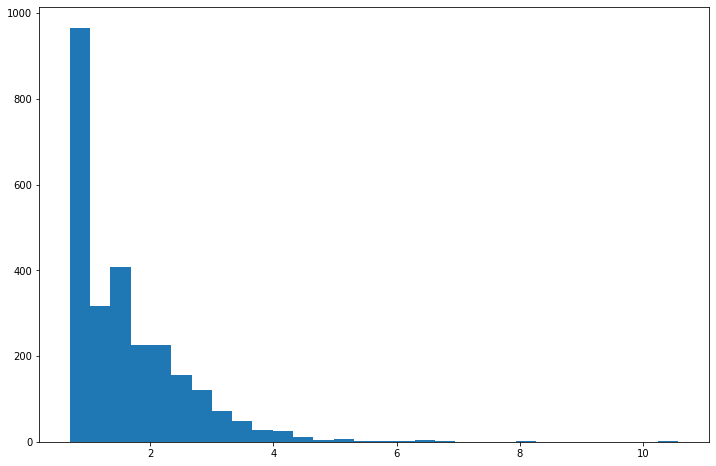

In [6]:
import matplotlib.pyplot as plt
import numpy as np

total_file_observations = [np.log1p(commit_stats['totalFiles']) for commit_stats in all_stats]
plt.figure(figsize=(12,8))
plt.hist(total_file_observations, 30)
plt.show()

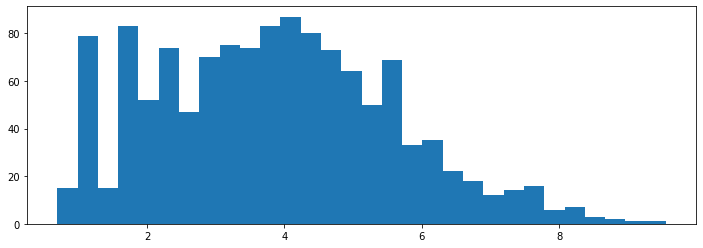

In [7]:
rust_commits = [commit for commit in all_stats if commit['rustLines'] > 0]
rust_lines_observations = [
    np.log1p(commit_stats['rustLines'])
    for commit_stats
    in rust_commits
]
plt.figure(figsize=(12,4))
plt.hist(rust_lines_observations, 30)
plt.show()

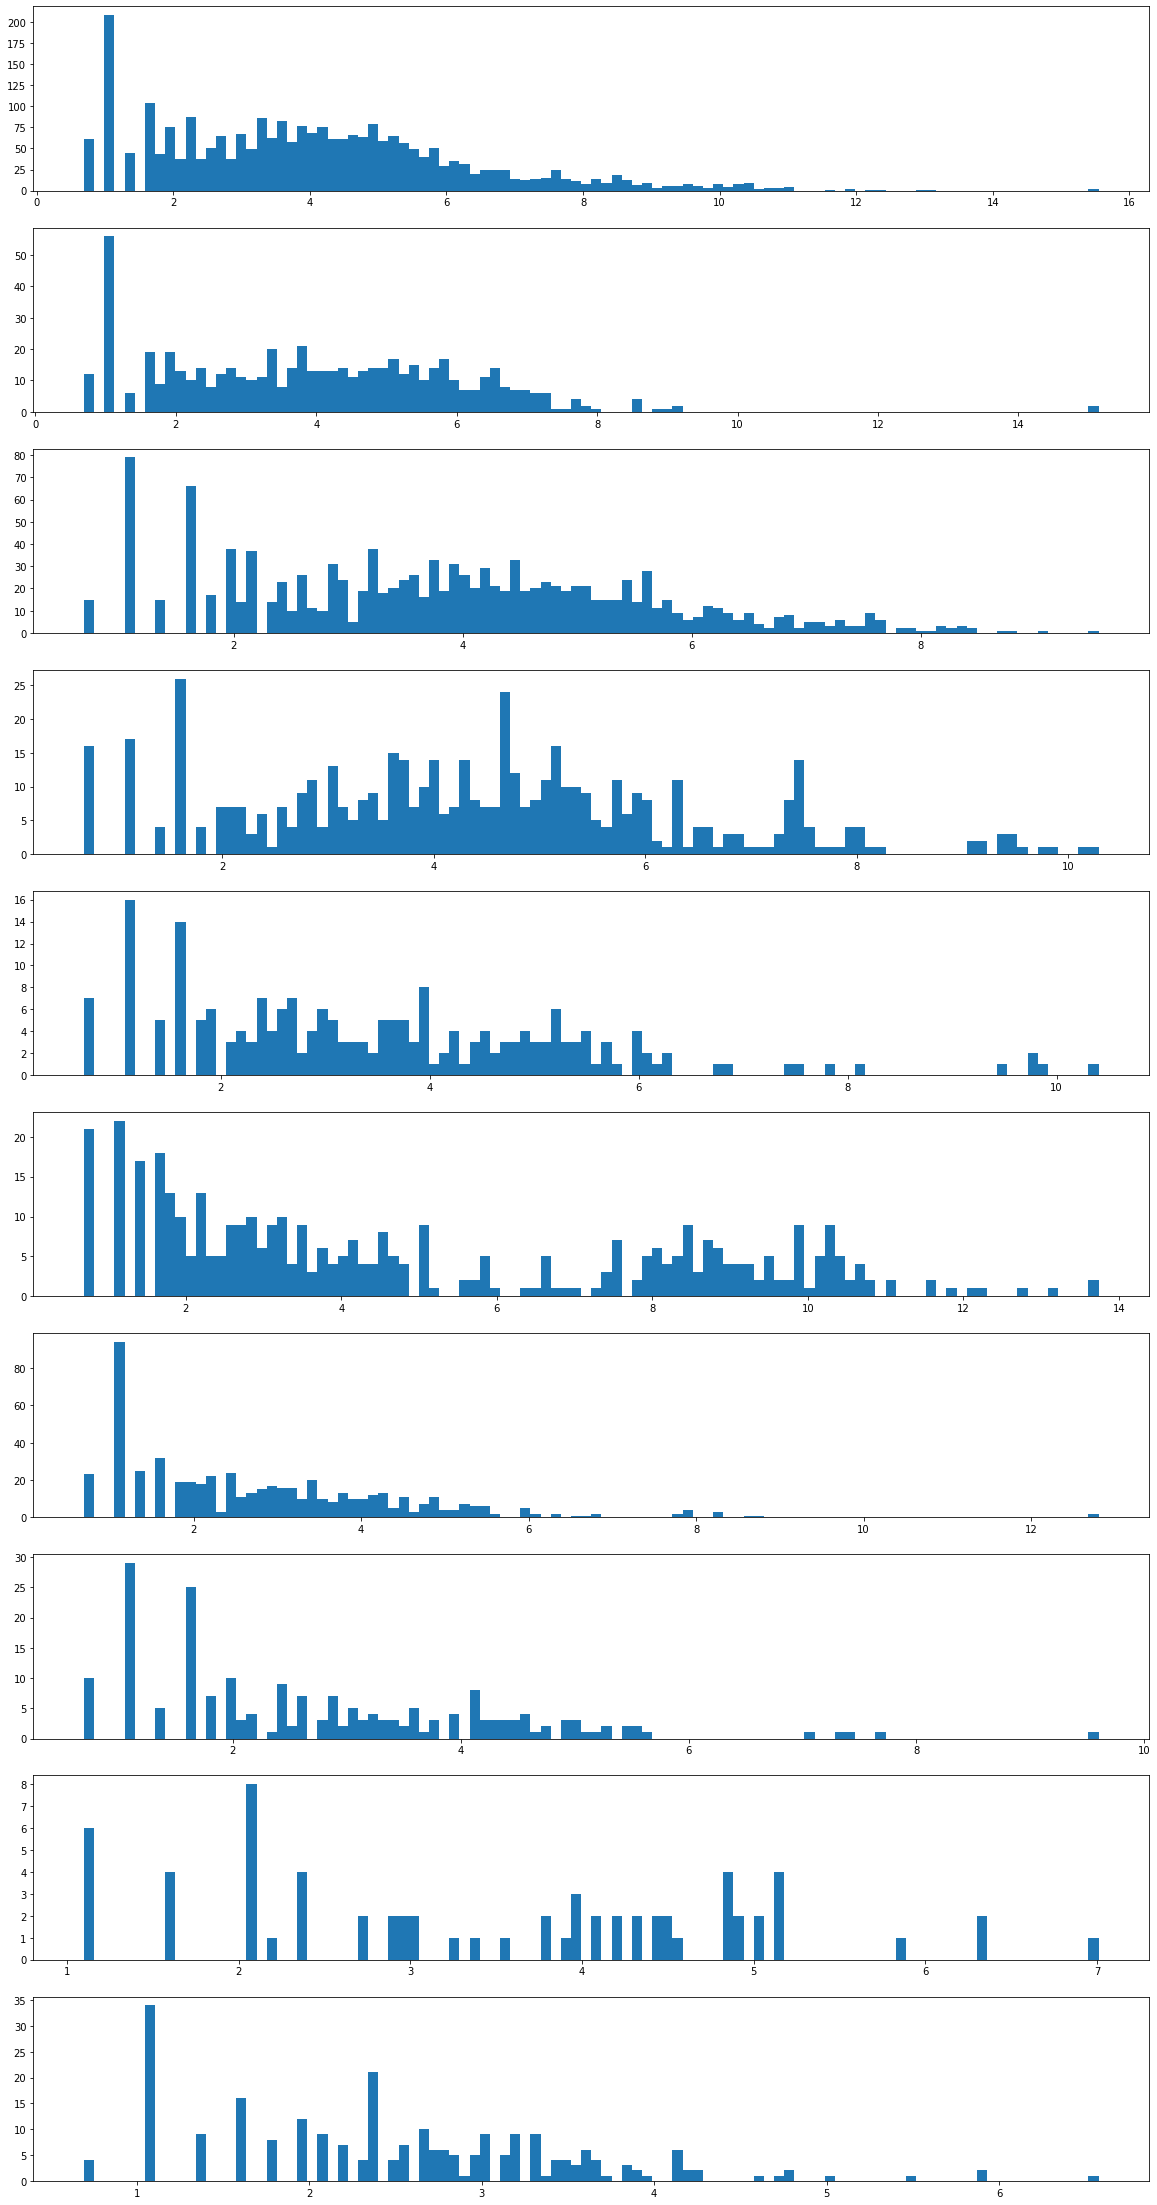

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def log1p_stat_array(stats_set, stat_name):
    return [np.log1p(stats[stat_name]) for stats in stats_set if stats[stat_name] > 0]

def hist_me_with_your_best_shot(axis, stats_set, stat_name):
    axis.hist(log1p_stat_array(stats_set, stat_name), 100)

textlines_array = log1p_stat_array(all_stats, 'textLines')
jslines_array = log1p_stat_array(all_stats, 'javascriptLines')
rustlines_array = log1p_stat_array(all_stats, 'rustLines')
markdownlines_array = log1p_stat_array(all_stats, 'markdownLines')
jsonlines_array = log1p_stat_array(all_stats, 'jsonLines')

fig, axs = plt.subplots(10, 1, figsize=(20,40))
hist_me_with_your_best_shot(axs[0], all_stats, 'textLines')
hist_me_with_your_best_shot(axs[1], all_stats, 'javascriptLines')
hist_me_with_your_best_shot(axs[2], all_stats, 'rustLines')
hist_me_with_your_best_shot(axs[3], all_stats, 'lockLines')
hist_me_with_your_best_shot(axs[4], all_stats, 'htmlLines')
hist_me_with_your_best_shot(axs[5], all_stats, 'jsonLines')
hist_me_with_your_best_shot(axs[6], all_stats, 'markdownLines')
hist_me_with_your_best_shot(axs[7], all_stats, 'yarnLines')
hist_me_with_your_best_shot(axs[8], all_stats, 'clojureLines')
hist_me_with_your_best_shot(axs[9], all_stats, 'shellLines')
plt.show()

In [18]:
commit_ids = []
fields = ['totalFiles', 'textLines', 'javascriptLines', 'rustLines',
          'lockLines', 'htmlLines', 'jsonLines', 'markdownLines',
          'yarnLines', 'clojureLines', 'shellLines']
rows = []
for commit in all_stats:
    commit_ids.append(commit['commit'])
    stat_array = []
    rows.append(stat_array)
    for field in fields:
        stat_array.append(np.log1p(commit[field]))

#print(rows)
import pandas as pd
cluster_df = pd.DataFrame(rows, index=commit_ids, columns=fields)
corr = cluster_df.corr()
corr

,totalFiles,textLines,javascriptLines,rustLines,lockLines,htmlLines,jsonLines,markdownLines,yarnLines,clojureLines,shellLines
totalFiles,1.000000,0.708600,0.259319,0.564621,0.531325,0.152005,0.403198,0.258100,0.232192,0.144928,0.445016
textLines,0.708600,1.000000,0.459163,0.432489,0.477947,0.264096,0.602582,0.256470,0.215958,0.137308,0.339453
javascriptLines,0.259319,0.459163,1.000000,-0.215234,0.026156,0.289786,0.494216,0.140061,0.130168,0.015388,0.131746
rustLines,0.564621,0.432489,-0.215234,1.000000,0.464629,-0.091704,-0.048303,-0.091170,0.051274,0.089236,0.289045
lockLines,0.531325,0.477947,0.026156,0.464629,1.000000,0.038123,0.139237,0.074796,0.152620,0.059338,0.354978
htmlLines,0.152005,0.264096,0.289786,-0.091704,0.038123,1.000000,0.267082,0.143983,0.108995,0.064042,0.134702
jsonLines,0.403198,0.602582,0.494216,-0.048303,0.139237,0.267082,1.000000,0.261784,0.190479,0.066212,0.294338
markdownLines,0.258100,0.256470,0.140061,-0.091170,0.074796,0.143983,0.261784,1.000000,0.103540,0.049747,0.233009
yarnLines,0.232192,0.215958,0.130168,0.051274,0.152620,0.108995,0.190479,0.103540,1.000000,0.063687,0.224987
clojureLines,0.144928,0.137308,0.015388,0.089236,0.059338,0.064042,0.066212,0.049747,0.063687,1.000000,0.170737
